<a href="https://colab.research.google.com/github/tuftsdatalab/python-geoprocessing/blob/main/Demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wrangling Spatial Data with Python Demos
Presented by Chad Fisher, Geospatial Data Science Specialist, TTS Research Technology

11.6.24

When collecting data for a project, it can get messy to find and download data, get it all into the same projection, and get everything down to the same extent. Today, we'll walk through some example data you might find out in the world and the steps you need to make it ready for GIS.

# Geo-coding and Reverse Geo-coding

Start with geo-coding to dust off the python skill

There are many different ways to geocode in python, including different packages and different providers, which can lead to many combinations of possibility. If it's not working in one, you can always try another!

The main package is GeoPy. It can access many different geocoding providers (the software that actually does the geocoding) and is a simple collection of all the different calls you'd have to make to each service.

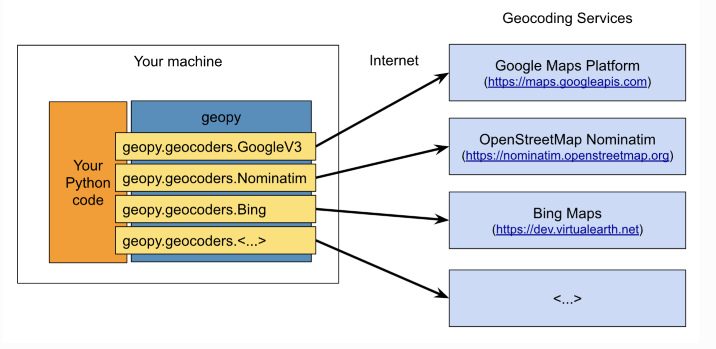

For a full list of available geocoders, see the [documentation](https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders). The ArcGIS REST API is one of the available geocoders, but we'll use OSM's Nominatim because it is usually accurate enough for demonstration purposes.

In [ ]:
import geopy

In [ ]:
geolocator = geopy.geocoders.Nominatim(user_agent="my-geocoder")

In [ ]:
location = geolocator.geocode("Tufts University")

Let's get a list of addresses I've compiled and try to geocode a table of data! I took the data from the [MA Ice Cream Trail](https://www.visitma.com/wp-content/uploads/2024/07/MA-Ice-Cream-Trail.pdf) and added the addresses, but there's not coordinate info. We could go to google maps and enter each address and copy paste the coordinates or use a for loop to geocode all the addresses systematically.

In [ ]:
!wget https://tufts.box.com/shared/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx

--2024-10-22 14:26:53--  https://tufts.box.com/shared/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx
Resolving tufts.box.com (tufts.box.com)... 74.112.186.157
Connecting to tufts.box.com (tufts.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx [following]
--2024-10-22 14:26:54--  https://tufts.box.com/public/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx [following]
--2024-10-22 14:26:54--  https://tufts.app.box.com/public/static/eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.157
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: ht

In [ ]:
import pandas as pd

In [ ]:
my_data=pd.read_excel('eg0zloro9ikv5pp9bzio1ld8q18qewls.xlsx')
my_data

,Address,Store Name
0,"1652 High Street, Westwood, MA 02090",Bubbling Brook
1,"743 Washington Street, Newton, MA 02460",Cabot’s Ice Cream & Restaurant
2,"684 Mt. Auburn Street, Watertown, MA 02472",Celebrity Pizza & Dairy Bar
3,"61 High Street, Medford, MA 02155",Colleen’s Ice Cream and Sandwich Shop
4,"407 Bay Road, Sharon, MA 02067",Crescent Ridge Dairy Bar


In [ ]:
location = geolocator.geocode(my_data.Address[2])

In [ ]:
location.raw

{'place_id': 18016323,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 11139918472,
 'lat': '42.3726207',
 'lon': '-71.1561306',
 'class': 'amenity',
 'type': 'restaurant',
 'place_rank': 30,
 'importance': 5.927138170438724e-05,
 'addresstype': 'amenity',
 'name': 'Celebrity Pizza and Dairy Bar',
 'display_name': 'Celebrity Pizza and Dairy Bar, 684, Mount Auburn Street, Mount Auburn, East Watertown, Watertown, Middlesex County, Massachusetts, 20478, United States',
 'boundingbox': ['42.3725707', '42.3726707', '-71.1561806', '-71.1560806']}

In [ ]:
location.latitude

42.3726207

In [ ]:
location.longitude

-71.1561306

In [ ]:
import geopandas as gpd

In [ ]:
my_addresses=gpd.tools.geocode(my_data.Address,provider='nominatim', user_agent="my-geocoder")
my_addresses

,geometry,address
0,POINT (-71.24985 42.20145),"1652, High Street, Westwood, Norfolk County, M..."
1,POINT (-71.204 42.35241),"743, Washington Street, Newtonville, Newton, M..."
2,POINT (-71.15613 42.37262),"Celebrity Pizza and Dairy Bar, 684, Mount Aubu..."
3,POINT (-71.11948 42.42075),"High Street, Medford Square, Medford, Middlese..."
4,POINT (-71.14826 42.12682),"Crescent Ridge Dairy Bar, 407, Bay Road, Sharo..."


In [ ]:
my_addresses.to_file('ice_cream_shops.geojson')

# Pre-processing Vector Data

Vector data online can come in a variety of formats:
- GeoJSON
- Shapefile
- Geopackage
- Tiles of data

It can also come in many different extents, projections, and combinations.

Let's get some example vector data:
1. Boston city boundary
2. Free Wi-Fi locations in Boston from Analyze Boston (GeoJSON)
3. MBTA bus routes (Shapefile)
4. FCC data on 5G data availability (Geopackage)
5. Land Use/Land Cover Data (tiles)

In [ ]:
Boston=gpd.read_file('https://bostonopendata-boston.opendata.arcgis.com/api/download/v1/items/142500a77e2a4dbeb94a86f7e0b568bc/shapefile?layers=9')

In [ ]:
WiFi=gpd.read_file('https://bostonopendata-boston.opendata.arcgis.com/api/download/v1/items/6a7a0ab4e964471f819d40078b17e7fa/geojson?layers=0')

In [ ]:
!wget https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/mbtabus.zip

--2024-10-21 18:34:29--  https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/mbtabus.zip
Resolving s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)... 16.182.42.168, 52.217.85.110, 16.182.71.24, ...
Connecting to s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)|16.182.42.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7821863 (7.5M) [application/x-zip-compressed]
Saving to: ‘mbtabus.zip.1’

mbtabus.zip.1       100%[===================>]   7.46M  38.3MB/s    in 0.2s    

2024-10-21 18:34:29 (38.3 MB/s) - ‘mbtabus.zip.1’ saved [7821863/7821863]



In [ ]:
import zipfile
zipfile.ZipFile('mbtabus.zip').extractall()

Upload FCC data into your runtime and then proceed:

Now it's time to read in our different types of data. GeoPandas is awesome because it can read all 3 of these data formats as well as many more. It also can read into zip files so there is no need to unzip the data!

In [ ]:
MBTA=gpd.read_file('mbtabus/MBTABUSSTOPS_PT.shp')

In [ ]:
FCC=gpd.read_file('FCC_Data.zip')

Let's see what all this data looks like!

<Axes: >

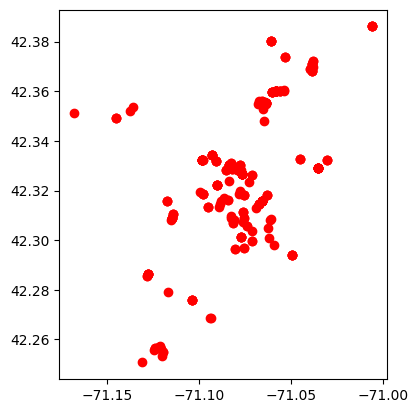

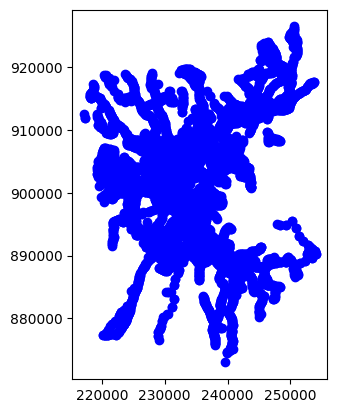

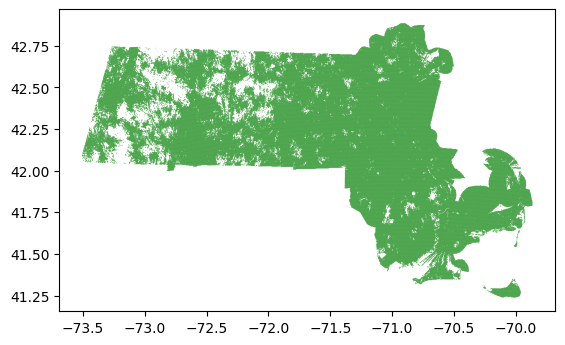

In [ ]:
WiFi.plot(color='red')
MBTA.plot(color='blue')
FCC.plot(color='green')

Some of the data is statewide. Another is only for the city of Boston. And MBTA routes are at yet a third scale.

Let's clip all our data to Boston. But first we have to check the projections of our data.

In [ ]:
Boston.crs

<Projected CRS: EPSG:2249>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
WiFi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
MBTA.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meter)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
FCC.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Some of our data is not projected!

Let's reproject all our data to be the same projection as the Boston boundary data:

In [ ]:
WiFi=WiFi.to_crs(Boston.crs)
MBTA=MBTA.to_crs(Boston.crs)
FCC=FCC.to_crs(Boston.crs)

And now we can clip the data:

In [ ]:
MBTA=MBTA.clip(Boston)
FCC=FCC.clip(Boston)

<Axes: >

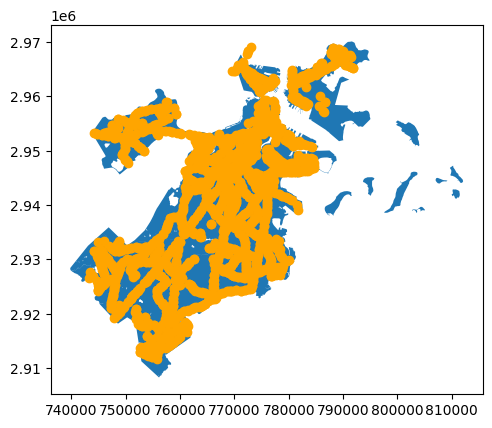

In [ ]:
ax=Boston.plot()
MBTA.plot(ax=ax,color='orange')

<Axes: >

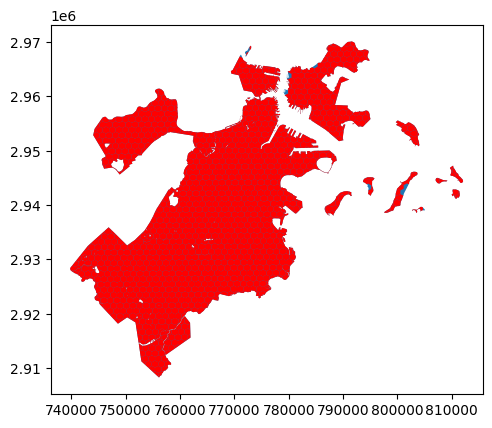

In [ ]:
ax=Boston.plot()
FCC.plot(ax=ax,color='red')

Now we can export our processed data to whatever format we want. This could be a GeoJSON or a shapefile or whatever format you need.

In [ ]:
mkdir WiFi_data

In [ ]:
WiFi.to_file('WiFi_data/WiFi.shp')

<ipython-input-74-241d4dabe6be>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  WiFi.to_file('WiFi_data/WiFi.shp')
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'neighborhood_id' to 'neighborho'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'neighborhood_name' to 'neighbor_1'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'device_serial' to 'device_ser'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'device_connectedto' to 'device_con'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'device_address' to 'device_add'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogri

In [ ]:
FCC.to_file('FCC_Data.geojson')

# Pre-processing Raster Data

Raster data can get tricky no matter where you are working with it. Sometimes you've got a lot of data that all has different cell sizes, projections, extents, and bands that you need to work with. Sometimes you have tiles you need to merge. Packages like rasterio and rioxarray are super helpful here!

Let's get some example raster data:
1. Wind Speed Data (needs to be clipped and reprojected)
2. (needs to have a different cell size)
3. (needs to be tiled)

In [ ]:
!wget 'https://globalwindatlas3.s3-eu-west-1.amazonaws.com/country_tifs/USA_wind-speed_10m.tif'

--2024-10-21 19:38:29--  https://globalwindatlas3.s3-eu-west-1.amazonaws.com/country_tifs/USA_wind-speed_10m.tif
Resolving globalwindatlas3.s3-eu-west-1.amazonaws.com (globalwindatlas3.s3-eu-west-1.amazonaws.com)... 3.5.65.151, 3.5.72.195, 52.92.34.154, ...
Connecting to globalwindatlas3.s3-eu-west-1.amazonaws.com (globalwindatlas3.s3-eu-west-1.amazonaws.com)|3.5.65.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702896032 (670M) [image/tiff]
Saving to: ‘USA_wind-speed_10m.tif’

USA_wind-speed_10m. 100%[===================>] 670.33M  34.3MB/s    in 20s     

2024-10-21 19:38:49 (33.4 MB/s) - ‘USA_wind-speed_10m.tif’ saved [702896032/702896032]



In [ ]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 18.8 MB/s eta 0:00:00


In [ ]:
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [ ]:
import geopandas as gpd

In [ ]:
NE_States=gpd.read_file('https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/ne/newengland.zip')

In [ ]:
Maine=NE_States[NE_States['NAME']=='MAINE']

In [ ]:
# Mask windspeed data
with rio.open('/content/USA_wind-speed_10m.tif') as src:
    out_meta = src.meta
    out_image, out_transform = rio.mask.mask(src, shapes=Maine.to_crs(4326).geometry, crop=True)


    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("wind2023.tif", "w", **out_meta) as dest:
    dest.write(out_image)

#Reproject windspeed data
dst_crs = 'EPSG:3857'

with rio.open('wind2023.tif') as src:

    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
        with rio.open('/content/WindSpeed_Reprojected.tif', 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)


DEM Tiles

In [ ]:
!wget https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/ME_SouthCoastal_2020_A20/TIFF/USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif

--2024-10-28 19:21:07--  https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/ME_SouthCoastal_2020_A20/TIFF/USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif
Resolving prd-tnm.s3.amazonaws.com (prd-tnm.s3.amazonaws.com)... 52.92.187.89, 52.218.237.91, 52.92.188.97, ...
Connecting to prd-tnm.s3.amazonaws.com (prd-tnm.s3.amazonaws.com)|52.92.187.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 396916782 (379M) [image/tiff]
Saving to: ‘USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif’

USGS_1M_19_x39y484_ 100%[===================>] 378.53M  16.1MB/s    in 25s     

2024-10-28 19:21:33 (14.9 MB/s) - ‘USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif’ saved [396916782/396916782]



In [ ]:
import glob

In [ ]:
# Mosaic DEM tiles
DEM_list=glob.glob('/content/USGS*.tif')
src_files_to_mosaic = []
for fp in DEM_list:
  src = rio.open(fp)
  src_files_to_mosaic.append(src)
mosaic, out_trans = merge(src_files_to_mosaic)
out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
"height": mosaic.shape[1],
"width": mosaic.shape[2],"transform": out_trans,"crs": "+proj=longlat +datum=WGS84 +no_defs"})

with rio.open("mosaic.tif", "w", **out_meta) as dest:
    dest.write(mosaic)

In [ ]:
DEM=rio.open('mosaic.tif')

In [ ]:
DEM=rio.open('/content/USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif')

In [ ]:
DEM

<open DatasetReader name='/content/USGS_1M_19_x39y484_ME_SouthCoastal_2020_A20.tif' mode='r'>

In [ ]:
DEM.crs

CRS.from_epsg(26919)

In [ ]:
DEM.read(1)

array([[51.52993  , 51.66295  , 51.78202  , ..., 10.4387865, 10.457841 ,
        10.449153 ],
       [51.563786 , 51.661964 , 51.737995 , ..., 10.429168 , 10.452251 ,
        10.457103 ],
       [51.55308  , 51.604965 , 51.64604  , ..., 10.422083 , 10.439016 ,
        10.451109 ],
       ...,
       [10.19195  , 10.163172 , 10.128601 , ..., 31.733416 , 31.567013 ,
        31.403996 ],
       [10.175991 , 10.158091 , 10.13997  , ..., 31.714598 , 31.542425 ,
        31.372389 ],
       [10.203241 , 10.186566 , 10.166152 , ..., 31.7936   , 31.625772 ,
        31.437849 ]], dtype=float32)

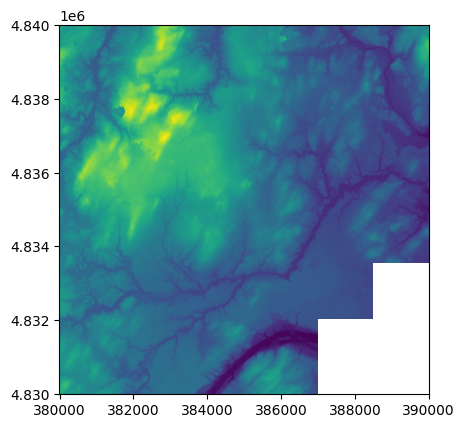

<Axes: >

In [ ]:
ax=show(DEM)
Maine.boundary.plot(ax=ax)

# Datasets

# iNaturalist species observations of bees on campus

In [ ]:
!pip install pyinaturalist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
import pyinaturalist
import pandas as pd
import geopandas as gpd

In [ ]:
years=[2020,2021,2022,2023,2024]

In [ ]:
taxon_id=pyinaturalist.v1.taxa.get_taxa(q='Bombus impatiens',rank='species')['results'][0]['id']
place_id=pyinaturalist.v1.places.get_places_autocomplete(q='Tufts University')['results'][0]['id']

In [ ]:
place_id

193616

In [ ]:
response=pyinaturalist.v1.observations.get_observations(year=years,taxon_id=taxon_id,geo=True,page='all',place_id=place_id)

In [ ]:
my_observations = pyinaturalist.Observation.from_json_list(response)
df = pd.DataFrame([{
          'ID': o.id,
          'latitude': o.location[0],
          'longitude': o.location[1],
          'date': o.observed_on.isoformat(),
          'quality': o.quality_grade,
          'uri': o.uri
          }
                   for o in my_observations
                   if o.location
                   ]
                  )

In [ ]:
obs=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
obs

,ID,latitude,longitude,date,quality,uri,geometry
0,47652499,42.403197,-71.113664,2020-05-28T13:56:59-04:00,research,https://www.inaturalist.org/observations/47652499,POINT (-71.11366 42.4032)
1,52630071,42.403207,-71.120631,2020-07-10T14:30:00-04:00,research,https://www.inaturalist.org/observations/52630071,POINT (-71.12063 42.40321)
2,52630076,42.403074,-71.120692,2020-07-10T14:30:00-04:00,research,https://www.inaturalist.org/observations/52630076,POINT (-71.12069 42.40307)
3,52630086,42.403236,-71.120422,2020-07-10T14:30:00-04:00,research,https://www.inaturalist.org/observations/52630086,POINT (-71.12042 42.40324)
4,53082059,42.403134,-71.120704,2020-07-13T00:00:00,research,https://www.inaturalist.org/observations/53082059,POINT (-71.1207 42.40313)
...,...,...,...,...,...,...,...
269,242739889,42.406383,-71.119658,2024-09-05T13:43:09-04:00,research,https://www.inaturalist.org/observations/24273...,POINT (-71.11966 42.40638)
270,242740138,42.403013,-71.113831,2024-09-08T18:01:56-04:00,research,https://www.inaturalist.org/observations/24274...,POINT (-71.11383 42.40301)
271,243460681,42.406617,-71.119506,2024-09-20T11:51:14-04:00,research,https://www.inaturalist.org/observations/24346...,POINT (-71.11951 42.40662)
272,246359586,42.406580,-71.121780,2024-10-08T14:57:56-04:00,research,https://www.inaturalist.org/observations/24635...,POINT (-71.12178 42.40658)


<Axes: >

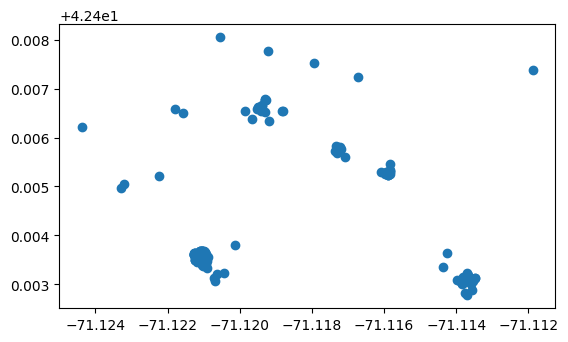

In [ ]:
obs.plot()

In [ ]:
!mkdir iNatData
obs.to_file('iNatData/iNat.shp')

mkdir: cannot create directory ‘iNatData’: File exists


In [ ]:
import shutil
shutil.make_archive('iNatData', 'zip', 'iNatData')

'/content/iNatData.zip'

In [ ]:
!wget https://dsl.richmond.edu/panorama/redlining/static/citiesData/MASomerville1939/geojson.json -O Redlining/Somerville.json
!wget https://dsl.richmond.edu/panorama/redlining/static/citiesData/MAMedford19XX/geojson.json -O Redlining/Medford.json

Redlining/Somerville.json: No such file or directory
Redlining/Medford.json: No such file or directory


In [ ]:
!wget https://tufts.box.com/shared/static/o4obicp84832t6lzdckrc3935ryy330i.zip

--2024-10-11 13:20:17--  https://tufts.box.com/shared/static/o4obicp84832t6lzdckrc3935ryy330i.zip
Resolving tufts.box.com (tufts.box.com)... 74.112.186.157
Connecting to tufts.box.com (tufts.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/o4obicp84832t6lzdckrc3935ryy330i.zip [following]
--2024-10-11 13:20:17--  https://tufts.box.com/public/static/o4obicp84832t6lzdckrc3935ryy330i.zip
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/o4obicp84832t6lzdckrc3935ryy330i.zip [following]
--2024-10-11 13:20:17--  https://tufts.app.box.com/public/static/o4obicp84832t6lzdckrc3935ryy330i.zip
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.157
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

In [ ]:
import zipfile

In [ ]:
zipfile.ZipFile('o4obicp84832t6lzdckrc3935ryy330i.zip').extractall()

In [ ]:
import glob

In [ ]:
glob.glob('/content/Somerville/*.shp')

['/content/Somerville/Parks.shp',
 '/content/Somerville/CityBlocks.shp',
 '/content/Somerville/Parcels2004.shp',
 '/content/Somerville/Streetscl.shp',
 '/content/Somerville/CityBoundary.shp',
 '/content/Somerville/neighborhoods.shp',
 '/content/Somerville/Buildings.shp']

In [ ]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 19.1 MB/s eta 0:00:00


In [ ]:
import contextily as cx

In [ ]:
import geopandas as gpd

In [ ]:
gpd.read_file(glob.glob('/content/Somerville/*.shp')[0])

,ID,PARK_NAME,AdoptASpot,AAS,geometry
0,1,Alewife Brook Park (MDC),None,NaN,"POLYGON ((756852.084 2977579.272, 756858.161 2..."
1,2,Central Hill Playground,Yes,1.0,"POLYGON ((765311.435 2965930.666, 765321.24 29..."
2,3,Draw 7 Park (MDC),None,NaN,"POLYGON ((770479.103 2967722.082, 770462.717 2..."
3,4,Foss Park (MDC),None,NaN,"POLYGON ((767861.858 2968692.659, 767981.029 2..."
4,5,Trum Field,Yes,1.0,"POLYGON ((762057.721 2970438.91, 762222.931 29..."
5,6,Nathan Tufts/Powder House Park,None,NaN,"POLYGON ((760099.876 2971323.122, 760019.672 2..."
6,7,Hodgkins/Curtin Park,Yes,1.0,"POLYGON ((757508.495 2971116.33, 757595.673 29..."
7,8,Dilboy Field (MDC),None,NaN,"POLYGON ((755441.167 2976283.564, 755598.877 2..."
8,9,North Street Playground,Yes,1.0,"POLYGON ((755841.994 2973387.021, 755799.143 2..."
9,10,Woodstock Playground,Yes,1.0,"POLYGON ((755015.292 2972697.063, 755080.731 2..."


In [ ]:
Parks = gpd.read_file(glob.glob('/content/Somerville/*.shp')[0])

<Axes: >

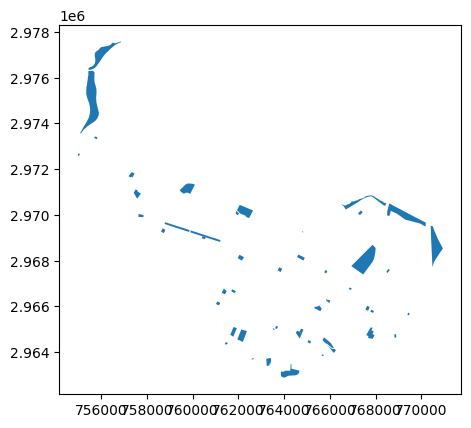

In [ ]:
Parks.plot()

In [ ]:
Parks.crs

<Projected CRS: PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEO ...>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

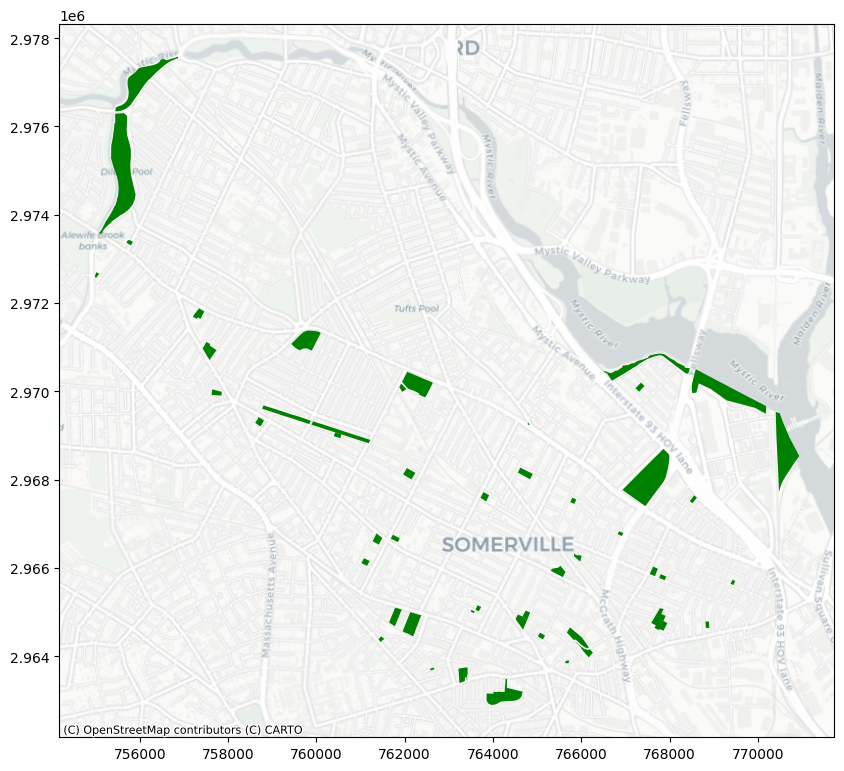

In [ ]:
ax=Parks.plot(figsize=(10,10),color='green')
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=Parks.crs)

In [ ]:
import ipyleaflet

In [ ]:
m = ipyleaflet.Map(center=[42.389122, -71.097145], zoom=13,basemap = ipyleaflet.basemaps.CartoDB.Positron())
m

Map(center=[42.389122, -71.097145], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [ ]:
Somerville=gpd.read_file('/content/Somerville/CityBoundary.shp')

In [ ]:
m.add_layer(Somerville)
m

Map(bottom=775620.0, center=[42.39151573685182, -71.09579082414018], controls=(ZoomControl(options=['position'…

In [ ]:
m.add_layer(Somerville.to_crs('EPSG:4326'))
m

Map(bottom=775620.0, center=[42.39151573685182, -71.09579082414018], controls=(ZoomControl(options=['position'…

# Example 2 - Querying APIs: the Census API

## What is an API?

An API, or application programming interface, is a standardized method for communicating between applications. For our purposes, they are structured ways to access data online. To read more about APIs, visit this resource from [Amazon](https://aws.amazon.com/what-is/api/)

## Packages used

We can use two packages **census** and **pygris** to access census data and geography data and join them much faster than if we had to download zipped data, extract it, clean it in Excel, bring into GIS, and join the data. The **us** package will help us in querying the Census API.

To make it easy to download and bring the data between python and other systems, we will use the open-source data format GeoJSON. If you want to use it in ArcGIS Pro, just run the tool JSON to Features to make the data usable. This will create a feature class or shapefile that you can then use. We don't want to use shapefiles directly here because they require a collection of files that can easily get lost in the process while GeoJSONs are single files with all the data and are often smaller!

In [ ]:
# install the needed packages
!pip install pygris census us

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 421.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 17.3 MB/s eta 0:00:00


In [ ]:
# Import packages for downloading census data tables
from census import Census
from us import states
import pandas as pd

Get API key from Census website: https://api.census.gov/data/key_signup.html

In [ ]:
# Type your key in here:
c=Census('your key')

We'll get data from 3 different census tables:
1. B25003: data on renters and ownership
  * Let's specifically get variables B25003_001E, B25003_002E, B25003_003E
2. B06001: median income by place of birth
  * Let's specifically get variables B06001_001E, B06001_002E, B06001_003E, B06001_004E, and B06001_005E



You can see all of the variables included in the 2022 ACS5 relase from the census website [here](https://api.census.gov/data/2022/acs/acs5/variables.html).

In [ ]:
MA_census = c.acs5.state_county_tract(fields = ('NAME','GEO_ID','B25003_001E','B25003_002E','B25003_003E'
                                                ,'B06001_001E','B06001_002E','B06001_003E','B06001_004E','B06001_005E'),
                                      state_fips = states.MA.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2022)

In [ ]:
MA_2022=pd.DataFrame(MA_census)
MA_2022.rename(columns={'B25003_001E': 'Total_Units',
                        'B25003_002E': 'Renter_Occupied',
                        'B25003_003E': 'Owner_Occupied',
                        'B06001_001E': 'Total_MedInc',
                        'B06001_002E': 'Born_in_State_MedInc',
                        'B06001_003E': 'Born_other_State_MedInc',
                        'B06001_004E': 'Native_born_else_MedInc',
                        'B06001_005E': 'Foreign_born_MedInc'}, inplace=True)

In [ ]:
MA_2022

,NAME,GEO_ID,Total_Units,Renter_Occupied,Owner_Occupied,Total_MedInc,Born_in_State_MedInc,Born_other_State_MedInc,Native_born_else_MedInc,Foreign_born_MedInc,state,county,tract
0,Census Tract 101; Barnstable County; Massachus...,1400000US25001010100,1996.0,1525.0,471.0,3630.0,116.0,184.0,121.0,330.0,25,001,010100
1,Census Tract 102.06; Barnstable County; Massac...,1400000US25001010206,1975.0,1696.0,279.0,4352.0,130.0,505.0,144.0,151.0,25,001,010206
2,Census Tract 102.08; Barnstable County; Massac...,1400000US25001010208,1031.0,862.0,169.0,1627.0,0.0,47.0,71.0,1.0,25,001,010208
3,Census Tract 103.04; Barnstable County; Massac...,1400000US25001010304,1363.0,1306.0,57.0,2739.0,42.0,230.0,154.0,149.0,25,001,010304
4,Census Tract 103.06; Barnstable County; Massac...,1400000US25001010306,1361.0,1233.0,128.0,2985.0,92.0,314.0,154.0,268.0,25,001,010306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,Census Tract 7611; Worcester County; Massachus...,1400000US25027761100,2010.0,1311.0,699.0,4985.0,267.0,806.0,365.0,737.0,25,027,761100
1616,Census Tract 7612; Worcester County; Massachus...,1400000US25027761200,2234.0,1071.0,1163.0,6023.0,410.0,1002.0,263.0,902.0,25,027,761200
1617,Census Tract 7613; Worcester County; Massachus...,1400000US25027761300,1299.0,1004.0,295.0,3615.0,290.0,582.0,266.0,719.0,25,027,761300
1618,Census Tract 7614.01; Worcester County; Massac...,1400000US25027761401,1427.0,1384.0,43.0,4287.0,336.0,703.0,262.0,361.0,25,027,761401


In [ ]:
# Get census geography data
from pygris import tracts, utils
MA_tracts=tracts(cb=True,year=2022,cache=True,state='MA')

Using FIPS code '25' for input 'MA'


In [ ]:
# Remove water
MA_tracts=pygris.utils.erase_water(MA_tracts)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:2675: UserWarning: `keep_geom_type=True` in overlay resulted in 33 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [ ]:
MA_tracts

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,25,001,011300,1400000US25001011300,25001011300,113,Census Tract 113,MA,Barnstable County,Massachusetts,CT,13113156,556274,"MULTIPOLYGON (((-70.20602 41.74636, -70.19508 ..."
1,25,001,012601,1400000US25001012601,25001012601,126.01,Census Tract 126.01,MA,Barnstable County,Massachusetts,CT,3467385,9794,"POLYGON ((-70.33489 41.66014, -70.32629 41.663..."
2,25,001,013500,1400000US25001013500,25001013500,135,Census Tract 135,MA,Barnstable County,Massachusetts,CT,23627496,1422547,"MULTIPOLYGON (((-70.45763 41.73073, -70.45344 ..."
3,25,009,250100,1400000US25009250100,25009250100,2501,Census Tract 2501,MA,Essex County,Massachusetts,CT,852256,198746,"MULTIPOLYGON (((-71.16232 42.70985, -71.1618 4..."
4,25,009,250500,1400000US25009250500,25009250500,2505,Census Tract 2505,MA,Essex County,Massachusetts,CT,300558,3894,"POLYGON ((-71.16996 42.72037, -71.16874 42.719..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,25,017,352400,1400000US25017352400,25017352400,3524,Census Tract 3524,MA,Middlesex County,Massachusetts,CT,225079,0,"POLYGON ((-71.09628 42.36488, -71.09542 42.367..."
1609,25,025,060101,1400000US25025060101,25025060101,601.01,Census Tract 601.01,MA,Suffolk County,Massachusetts,CT,295623,0,"POLYGON ((-71.03128 42.33483, -71.02923 42.335..."
1610,25,025,091001,1400000US25025091001,25025091001,910.01,Census Tract 910.01,MA,Suffolk County,Massachusetts,CT,1186269,447567,"POLYGON ((-71.05888 42.31277, -71.05721 42.312..."
1611,25,017,363202,1400000US25017363202,25017363202,3632.02,Census Tract 3632.02,MA,Middlesex County,Massachusetts,CT,6166481,43773,"POLYGON ((-71.47984 42.49098, -71.47973 42.490..."


In [ ]:
# Join data to geography
MA_tracts_2022=MA_tracts.merge(MA_2022,left_on='AFFGEOID',right_on='GEO_ID')

<Axes: >

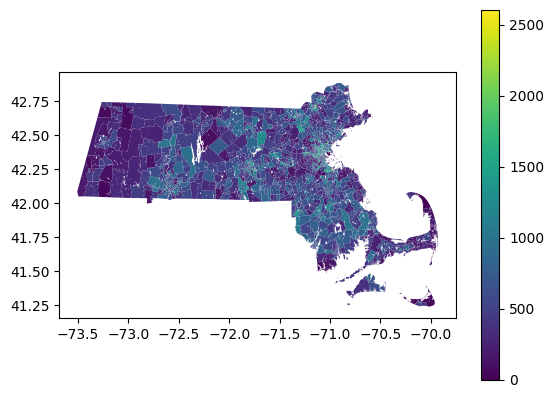

In [ ]:
MA_tracts_2022.plot(column='Foreign_born_MedInc', legend=True)

In [ ]:
MA_tracts_2022.to_file('MA_tracts_2022.geojson')

Quick demo of how to convert in Pro to features

# Example 3: Raster data from Google Earth Engine Data Catalog

# Example 4: Downloading Basemap data using sam-geo